In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import neattext.functions as nfx

In [2]:
# Plot settings
plt.style.use("https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt")
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

### Choose Dataset

In [3]:
#option 1 from https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text
df = pd.read_csv('../data/tweet_emotions.csv')
df.columns = ['tweet_id', 'emotion', 'text']

In [3]:
#option 2 from https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp
df = pd.read_csv('../data/emotions_nlp_train.txt', sep = ';', header=None)
df.columns = ['text', 'emotion']

In [13]:
#option 3 from https://github.com/SannketNikam/Emotion-Detection-in-Text
df = pd.read_csv('../data/emotions_dataset_raw.csv')

In [14]:
df.head()

,emotion,text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [15]:
df['emotion'].value_counts()

emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='emotion'>

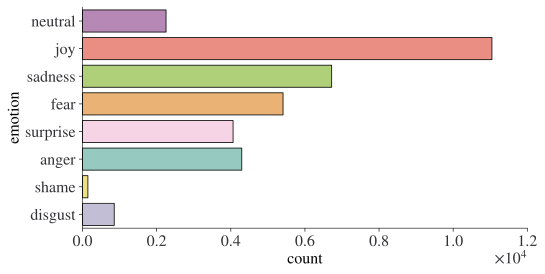

In [16]:
sns.countplot(y='emotion', data=df)

In [17]:
#dir(nfx)

In [18]:
#remove userhandles and stopwords
df['clean_text'] = df['text'].apply(nfx.remove_userhandles)
df['clean_text'] = df['clean_text'].apply(nfx.remove_stopwords)
df.head()

,emotion,text,clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...


### Choose Model

In [19]:
x = df['clean_text']
y = df['emotion']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [24]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])
# no days in the gym
pipe_lr.fit(x_train,y_train)
# after training houni musclé
pipe_lr.score(x_test,y_test)

0.6309814628538584

In [23]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5615749389280069

In [21]:
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('rf', MultinomialNB())])
pipe_nb.fit(x_train,y_train)
pipe_nb.score(x_test,y_test)

0.775625

### Test Model

In [25]:
def predict_proba(pipe, text):
    plt.barh(pipe.classes_, pipe.predict_proba([text])[0])
    plt.show()

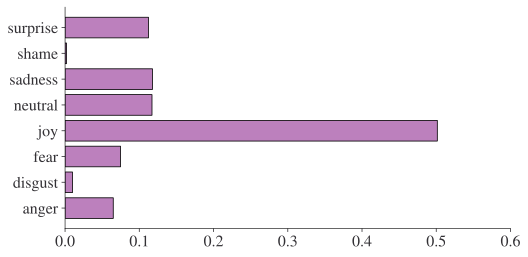

In [31]:
predict_proba(pipe_lr, "Write something here...")

### Other Models

In [ ]:
vectorizer = CountVectorizer(max_features=3000)
svm = SVC(kernel="linear", C=0.5, random_state=42)
logistic = LogisticRegression(random_state=42, max_iter=1000)

svm_pipeline = Pipeline([("vectorizer", vectorizer), ("svm", svm)])
logistic_pipeline = Pipeline([("vectorizer", vectorizer), ("logistic", logistic)])

voting_classifier = VotingClassifier(
    estimators=[
        ("svm", svm_pipeline),
        ("logistic", logistic_pipeline)
    ],
    voting='hard'
)

voting_classifier.fit(x_train,y_train)
voting_classifier.score(x_test,y_test)

In [20]:
voting_classifier.predict(["Write something here..."])

array(['joy'], dtype=object)

### Save Model

In [32]:
import joblib
pipeline_file = open("emotional_compass.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()